In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_train = pd.read_csv('C:/Users/markc/Downloads/train.csv')

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [4]:
data_train.describe()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


In [787]:
data_train_label = data_train['Survived']
data_train_id = data_train['PassengerId']

In [788]:
relatives = data_train.SibSp + data_train.Parch
data_train['Relatives'] = relatives

In [789]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [790]:
data_train.drop(['PassengerId', 'Survived', 'Name', 'Cabin', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)
data_train = data_train.reset_index(drop=True)

**Заполняем NaN-ы**

In [791]:
data_train[(data_train['Embarked'].notna()) & (data_train['Sex'] == 'female')].groupby('Embarked').Fare.mean()

Embarked
C    75.169805
Q    12.634958
S    38.740929
Name: Fare, dtype: float64

In [792]:
data_train.loc[data_train['Embarked'].isna(), 'Embarked'] = 'C'

In [793]:
data_train.loc[(data_train['Age'].isna()) & (data_train['Sex'] == 'female')  & (data_train['Embarked'] == 'C') & 
           (data_train['Pclass'] == 1), 'Age'] = 36.052632

data_train.loc[(data_train['Age'].isna()) & (data_train['Sex'] == 'female')  & (data_train['Embarked'] == 'S') & 
           (data_train['Pclass'] == 1), 'Age'] = 33.456522
           
data_train.loc[(data_train['Age'].isna()) & (data_train['Sex'] == 'male')  & (data_train['Embarked'] == 'C') & 
           (data_train['Pclass'] == 1), 'Age'] = 40.111111
           
data_train.loc[(data_train['Age'].isna()) & (data_train['Sex'] == 'male')  & (data_train['Embarked'] == 'S') & 
           (data_train['Pclass'] == 1), 'Age'] = 41.897188

data_train.loc[(data_train['Age'].isna()) & (data_train['Sex'] == 'female')  & (data_train['Embarked'] == 'Q') & 
           (data_train['Pclass'] == 2), 'Age'] = 30.0
           
data_train.loc[(data_train['Age'].isna()) & (data_train['Sex'] == 'female')  & (data_train['Embarked'] == 'S') & 
           (data_train['Pclass'] == 2), 'Age'] = 29.719697

data_train.loc[(data_train['Age'].isna()) & (data_train['Sex'] == 'male')  & (data_train['Embarked'] == 'C') & 
           (data_train['Pclass'] == 2), 'Age'] = 25.937500

data_train.loc[(data_train['Age'].isna()) & (data_train['Sex'] == 'male')  & (data_train['Embarked'] == 'S') & 
           (data_train['Pclass'] == 2), 'Age'] = 30.875889

data_train.loc[(data_train['Age'].isna()) & (data_train['Sex'] == 'female')  & (data_train['Embarked'] == 'C') & 
           (data_train['Pclass'] == 3), 'Age'] = 14.062500

data_train.loc[(data_train['Age'].isna()) & (data_train['Sex'] == 'female')  & (data_train['Embarked'] == 'Q') & 
           (data_train['Pclass'] == 3), 'Age'] = 22.85

data_train.loc[(data_train['Age'].isna()) & (data_train['Sex'] == 'female')  & (data_train['Embarked'] == 'S') & 
           (data_train['Pclass'] == 3), 'Age'] = 23.223684

data_train.loc[(data_train['Age'].isna()) & (data_train['Sex'] == 'male')  & (data_train['Embarked'] == 'C') & 
           (data_train['Pclass'] == 3), 'Age'] = 25.0168

data_train.loc[(data_train['Age'].isna()) & (data_train['Sex'] == 'male')  & (data_train['Embarked'] == 'Q') & 
           (data_train['Pclass'] == 3), 'Age'] = 28.142857

data_train.loc[(data_train['Age'].isna()) & (data_train['Sex'] == 'male')  & (data_train['Embarked'] == 'S') & 
           (data_train['Pclass'] == 3), 'Age'] = 26.574766

In [794]:
data_train.loc[(data_train['Fare'] == 0) & (data_train['Sex'] == 'male') & (data_train['Embarked'] == 'S') & 
               (data_train['Pclass'] == 1), 'Fare'] = data_train[(data_train['Sex'] == 'male') & 
                                                                 (data_train['Embarked'] == 'S') & 
                                                                 (data_train['Pclass'] == 1)].Fare.mean()

data_train.loc[(data_train['Fare'] == 0) & (data_train['Sex'] == 'male') & (data_train['Embarked'] == 'S') & 
               (data_train['Pclass'] == 2), 'Fare'] = data_train[(data_train['Sex'] == 'male') & 
                                                                 (data_train['Embarked'] == 'S') & 
                                                                 (data_train['Pclass'] == 2)].Fare.mean()

data_train.loc[(data_train['Fare'] == 0) & (data_train['Sex'] == 'male') & (data_train['Embarked'] == 'S') & 
               (data_train['Pclass'] == 3), 'Fare'] = data_train[(data_train['Sex'] == 'male') & 
                                                                 (data_train['Embarked'] == 'S') & 
                                                                 (data_train['Pclass'] == 3)].Fare.mean()

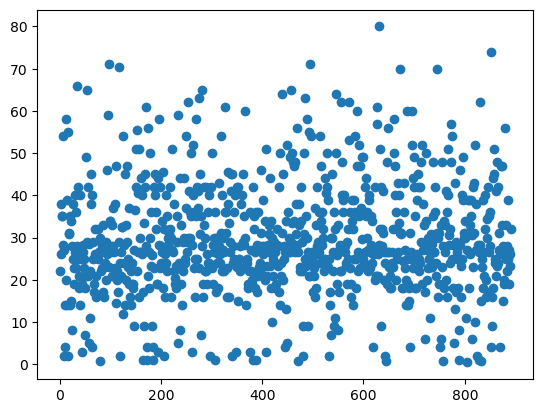

In [795]:
x = data_train_id.tolist()
y = data_train.Age.tolist()
plt.scatter(x, y)

In [796]:
data_train.loc[data_train.Fare > 400, 'Fare'] = data_train[(data_train.Fare < 400) & (data_train.Embarked == 'C') & 
                                                           (data_train.Pclass == 1) & (data_train.Age > 34) & 
                                                           (data_train.Age < 37)].Fare.mean() + 1

In [797]:
data_train.loc[(data_train.Relatives > 9), 'Relatives'] = data_train[(data_train.Relatives < 9)].Relatives.max()

In [798]:
data_train = data_train.astype({'Age': np.int64})
data_train = data_train.astype({'Fare': np.int64})

In [799]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Pclass     891 non-null    int64 
 1   Sex        891 non-null    object
 2   Age        891 non-null    int64 
 3   Fare       891 non-null    int64 
 4   Embarked   891 non-null    object
 5   Relatives  891 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 41.9+ KB


In [800]:
real_cols = data_train[['Age', 'Fare']]
cat_cols = data_train[['Pclass', 'Sex', 'Embarked', 'Relatives']]

In [801]:
from sklearn.preprocessing import StandardScaler

In [802]:
scaler = StandardScaler()
scaler_real_cols = pd.DataFrame(scaler.fit_transform(real_cols), columns=scaler.get_feature_names_out())

In [495]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [803]:
#ohe = OneHotEncoder()
label = LabelEncoder()
#one_hot_cat_cols = pd.DataFrame(ohe.fit_transform(cat_cols).toarray(), columns=ohe.get_feature_names_out())
#label_cat_cols = pd.DataFrame(label.fit_transform(cat_cols).toarray(), columns=label.get_feature_names_out())
label_cat_cols = cat_cols.apply(LabelEncoder().fit_transform)

In [804]:
X = pd.concat([scaler_real_cols, label_cat_cols], axis='columns', ignore_index=True)

In [805]:
X

,0,1,2,3,4,5
0,-0.541857,-0.580015,2,1,2,1
1,0.659312,0.977105,0,0,0,1
2,-0.241565,-0.580015,2,0,2,0
3,0.434093,0.539165,0,0,2,1
4,0.434093,-0.555685,2,1,2,0
...,...,...,...,...,...,...
886,-0.166492,-0.434035,1,1,2,0
887,-0.767077,-0.020425,0,0,2,0
888,-0.466784,-0.190735,2,0,2,3
889,-0.241565,-0.020425,0,1,0,0


In [806]:
from sklearn.model_selection import train_test_split

In [815]:
X_train, X_test, y_train, y_test = train_test_split(X, data_train_label, test_size=0.2)

In [808]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier, RidgeClassifier, RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score

**KNN** 5 min

In [551]:
knn = KNeighborsClassifier()
params_knn = {'n_neighbors': range(1, 51),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              #'leaf_size': range(1, 51),
              'p': range(1, 3),
              'metric': ['cityblock', 'cosine', 'euclidean', 'haversine', 'l1', 'l2', 'manhattan', 'nan-euclidean']}
grid_knn = GridSearchCV(knn, params_knn, n_jobs=-1)
grid_knn.fit(X_train, y_train)

C:\Users\markc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
9000 fits failed out of a total of 32000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\markc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\markc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 215, in fit
    return self._fit(X, y)
  File "C:\Users\markc\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 646, in _fit
    self._tree = BallTree(
  File "sklearn\neighbors\_binary_tree.pxi",

C:\Users\markc\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.74577957 0.74577957 0.74577957 ...        nan        nan        nan]
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['cityblock', 'cosine', 'euclidean',
                                    'haversine', 'l1', 'l2', 'manhattan',
                                    'nan-euclidean'],
                         'n_neighbors': range(1, 51), 'p': range(1, 3),
                         'weights': ['uniform', 'distance']})

In [552]:
grid_knn.best_params_

{'algorithm': 'auto',
 'metric': 'cityblock',
 'n_neighbors': 24,
 'p': 1,
 'weights': 'uniform'}

In [553]:
knn = KNeighborsClassifier(algorithm='auto', metric='cityblock', n_neighbors=24, p=1, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='cityblock', n_neighbors=24, p=1)

In [554]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       117
           1       0.84      0.69      0.76        62

    accuracy                           0.85       179
   macro avg       0.85      0.81      0.83       179
weighted avg       0.85      0.85      0.85       179



In [555]:
print(accuracy_score(y_test, y_pred))

0.8491620111731844


**LOGREGRESSION** 1 min

In [816]:
logistic = LogisticRegression()
params_log = {'penalty': [None, 'l1', 'l2', 'elasticnet'],
              'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
              'C': np.arange(0.1, 2.1, 0.1),
              #'class_weight': ['balanced', dict, None],
              'multi_class': ['auto', 'ovr', 'multinomial']}
              #'verbose': range(0, 11)
              #'l1_ratio': np.arange(0, 1.1, 0.1)
grid_log = GridSearchCV(logistic, params_log, n_jobs=-1)
grid_log.fit(X_train, y_train)

C:\Users\markc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3700 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\markc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\markc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1216, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\markc\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 1223, in _fit_liblinear
    solver_type = _get_liblinear_

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': [None, 'l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [817]:
grid_log.best_params_

{'C': 0.8, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}

In [818]:
logistic = LogisticRegression(C=0.8, multi_class='auto', penalty='l2', solver='liblinear')
logistic.fit(X_train, y_train)

LogisticRegression(C=0.8, solver='liblinear')

In [819]:
y_pred = logistic.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.68      0.71        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



In [820]:
print(f1_score(y_test, y_pred))

0.7142857142857142


**LogRegressionCV** 3 min

In [681]:
log_cv = LogisticRegressionCV()
params_log_cv = {'penalty': [None, 'l1', 'l2', 'elasticnet'],
                 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                 'cv': range(2, 10),
                 #'class_weight': ['balanced', dict, None],
                 'multi_class': ['auto', 'ovr', 'multinomial']}
                 #'verbose': range(0, 11),
                 #'l1_ratio': np.arange(0, 1.1, 0.1)
grid_log_cv = GridSearchCV(log_cv, params_log_cv, n_jobs=-1)
grid_log_cv.fit(X_train, y_train)

C:\Users\markc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2040 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
378 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\markc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\markc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1760, in fit
    self._validate_params()
  File "C:\Users\markc\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\markc\anaconda3\lib\

C:\Users\markc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\markc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(estimator=LogisticRegressionCV(), n_jobs=-1,
             param_grid={'cv': range(2, 10),
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': [None, 'l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [682]:
grid_log_cv.best_params_

{'cv': 8, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}

In [685]:
log_cv = LogisticRegressionCV(cv=8,multi_class='multinomial',  penalty='l2', solver='lbfgs')
log_cv.fit(X_train, y_train)

C:\Users\markc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\markc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV(cv=8, multi_class='multinomial')

In [686]:
y_pred = log_cv.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       111
           1       0.82      0.79      0.81        68

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [688]:
print(f1_score(y_test, y_pred))

0.8059701492537314


**SGD** 20 sec

In [689]:
sgd = SGDClassifier()
params_sgd = {'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
              'penalty': ['l2', 'l1', 'elasticnet', None],
              'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'],
              'eta0': np.arange(0.0, 1.1, 0.1)}
grid_sgd = GridSearchCV(sgd, params_sgd, n_jobs=-1)
grid_sgd.fit(X_train, y_train)

C:\Users\markc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 7920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\markc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\markc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 892, in fit
    self._more_validate_params()
  File "C:\Users\markc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 149, in _more_validate_params
    raise ValueError("eta

GridSearchCV(estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'eta0': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'learning_rate': ['optimal', 'constant', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge', 'log_loss', 'modified_huber',
                                  'squared_hinge', 'perceptron',
                                  'squared_error', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'penalty': ['l2', 'l1', 'elasticnet', None]})

In [691]:
grid_sgd.best_params_

{'eta0': 0.30000000000000004,
 'learning_rate': 'optimal',
 'loss': 'log_loss',
 'penalty': 'elasticnet'}

In [692]:
sgd = SGDClassifier(eta0=0.3, learning_rate='optimal', loss='log_loss', penalty='elasticnet')
sgd.fit(X_train, y_train)

SGDClassifier(eta0=0.3, loss='log_loss', penalty='elasticnet')

In [693]:
y_pred = sgd.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       111
           1       0.69      0.85      0.76        68

    accuracy                           0.80       179
   macro avg       0.79      0.81      0.79       179
weighted avg       0.82      0.80      0.80       179



In [695]:
print(f1_score(y_test, y_pred))

0.7631578947368423


**TREE** 2 sec

In [696]:
tree = DecisionTreeClassifier()
params_tree = {'criterion': ['gini', 'entropy', 'log_loss'],
               'splitter': ['best', 'random'],
               'max_features': ['auto', 'sqrt', 'log2', None]}
grid_tree = GridSearchCV(tree, params_tree, n_jobs=-1)
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'splitter': ['best', 'random']})

In [697]:
grid_tree.best_params_

{'criterion': 'gini', 'max_features': None, 'splitter': 'best'}

In [698]:
tree = DecisionTreeClassifier(criterion='gini', max_features=None, splitter='best')
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [699]:
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       111
           1       0.75      0.81      0.78        68

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [701]:
print(f1_score(y_test, y_pred))

0.7801418439716311


**SVM** 30 sec

In [702]:
svm = SVC()
params_svm = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'gamma': ['scale', 'auto'],
             'C': np.arange(0.1, 2.1, 0.1),
             'degree': range(1, 6)}
grid_svm = GridSearchCV(svm, params_svm, n_jobs=-1)
grid_svm.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
                         'degree': range(1, 6), 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [703]:
grid_svm.best_params_

{'C': 1.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

In [704]:
svm = SVC(C=1.1, degree=2, gamma='scale', kernel='poly')
svm.fit(X_train, y_train)

SVC(C=1.1, degree=2, kernel='poly')

In [705]:
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       111
           1       0.85      0.74      0.79        68

    accuracy                           0.85       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



In [707]:
print(f1_score(y_test, y_pred))

0.7874015748031497


**RandomForest** 2 min

In [708]:
rnd_for = RandomForestClassifier()
params_rnd_for = {'n_estimators': range(2, 101),
                  'criterion': ['gini', 'entropy', 'log_loss']}
grid_rnd_for = GridSearchCV(rnd_for, params_rnd_for, n_jobs=-1)
grid_rnd_for.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': range(2, 101)})

In [709]:
grid_rnd_for.best_params_

{'criterion': 'log_loss', 'n_estimators': 21}

In [710]:
rnd_for = RandomForestClassifier(criterion='log_loss', n_estimators=21)
rnd_for.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=21)

In [711]:
y_pred = rnd_for.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       111
           1       0.72      0.76      0.74        68

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [713]:
print(f1_score(y_test, y_pred))

0.7428571428571428


**RidgeClassifier** 1 min

In [714]:
params_ridge = {'alpha': np.arange(0.1, 2.1, 0.1),
                'fit_intercept': [True, False],
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}
grid_ridge = GridSearchCV(RidgeClassifier(), params_ridge, n_jobs=-1)
grid_ridge.fit(X_train, y_train)

C:\Users\markc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\markc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\markc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1424, in fit
    super().fit(X, Y, sample_weight=sample_weight)
  File "C:\Users\markc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 825, in fit
    raise ValueError(
ValueError: 'lbfgs' solver can

GridSearchCV(estimator=RidgeClassifier(), n_jobs=-1,
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
                         'fit_intercept': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']})

In [715]:
grid_ridge.best_params_

{'alpha': 1.0, 'fit_intercept': True, 'solver': 'auto'}

In [716]:
ridge = RidgeClassifier(alpha=1.0, fit_intercept=True, solver='auto')
ridge.fit(X_train, y_train)

RidgeClassifier()

In [717]:
y_pred = ridge.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       111
           1       0.80      0.78      0.79        68

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [719]:
print(f1_score(y_test, y_pred))

0.7910447761194029


**RidgeClassifierCV** 10 sec

In [720]:
params_ridgecv = {'fit_intercept': [True, False]}
grid_ridgecv = GridSearchCV(RidgeClassifierCV(), params_ridgecv, n_jobs=-1)
grid_ridgecv.fit(X_train, y_train)

GridSearchCV(estimator=RidgeClassifierCV(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False]})

In [721]:
grid_ridgecv.best_params_

{'fit_intercept': True}

In [722]:
ridgecv = RidgeClassifierCV(fit_intercept=True)
ridgecv.fit(X_train, y_train)

RidgeClassifierCV()

In [723]:
y_pred = ridgecv.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       111
           1       0.81      0.79      0.80        68

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [725]:
print(f1_score(y_test, y_pred))

0.8


**MLP** 1 min

In [726]:
params_mlp = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'learning_rate': ['constant', 'invscaling', 'adaptive']}
              #'max_iter': np.arange(200, 301)}
grid_mlp = GridSearchCV(MLPClassifier(), params_mlp, n_jobs=-1)
grid_mlp.fit(X_train, y_train)

C:\Users\markc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [727]:
grid_mlp.best_params_

{'activation': 'relu', 'learning_rate': 'invscaling', 'solver': 'adam'}

In [728]:
mlp = MLPClassifier(activation='relu', learning_rate='invscaling', solver='adam')
mlp.fit(X_train, y_train)

C:\Users\markc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(learning_rate='invscaling')

In [729]:
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       111
           1       0.83      0.71      0.76        68

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



In [731]:
print(f1_score(y_test, y_pred))

0.7619047619047619


**AdaBoostClassifier** 1 min

In [732]:
params_ada = {'n_estimators': range(2, 101),
              #'learning_rate': np.arange(0.1, 1.1, 0.1),
              'algorithm': ['SAMME', 'SAMME.R']}
grid_ada = GridSearchCV(AdaBoostClassifier(), params_ada, n_jobs=-1)
grid_ada.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': range(2, 101)})

In [733]:
grid_ada.best_params_

{'algorithm': 'SAMME.R', 'n_estimators': 38}

In [734]:
ada = AdaBoostClassifier(algorithm='SAMME.R', n_estimators=38)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=38)

In [735]:
y_pred = ada.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       111
           1       0.81      0.81      0.81        68

    accuracy                           0.85       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.85      0.85      0.85       179



In [737]:
print(f1_score(y_test, y_pred))

0.8088235294117648


**ExtraTreesClassifier** 1 min

In [738]:
params_extra = {'n_estimators': range(2, 101),
                'criterion': ['gini', 'entropy', 'log_loss']}
grid_extra = GridSearchCV(ExtraTreesClassifier(), params_extra, n_jobs=-1)
grid_extra.fit(X_train, y_train)

GridSearchCV(estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': range(2, 101)})

In [739]:
grid_extra.best_params_

{'criterion': 'entropy', 'n_estimators': 6}

In [740]:
extra = ExtraTreesClassifier(criterion='entropy', n_estimators=6)
extra.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', n_estimators=6)

In [741]:
y_pred = extra.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       111
           1       0.74      0.75      0.74        68

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



In [743]:
print(f1_score(y_test, y_pred))

0.7445255474452556


**GradientBoostingClassifier** 12 min

In [744]:
params_grad = {'loss': ['log_loss', 'exponential'],
               'learning_rate': np.arange(0.1, 1.1, 0.1),
               'n_estimators': range(2, 101),
               'criterion': ['friedman_mse', 'squared_error']}
grid_grad = GridSearchCV(GradientBoostingClassifier(), params_grad, n_jobs=-1)
grid_grad.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': range(2, 101)})

In [745]:
grid_grad.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.6,
 'loss': 'exponential',
 'n_estimators': 38}

In [746]:
grad = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.6, loss='exponential', n_estimators=38)
grad.fit(X_train, y_train)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.6,
                           loss='exponential', n_estimators=38)

In [747]:
y_pred = grad.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       111
           1       0.79      0.79      0.79        68

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [748]:
print(f1_score(y_test, y_pred))

0.7941176470588235


**logregression, logregressioncv, svm, randomforest**

## TEST

In [821]:
data_test = pd.read_csv('C:/Users/markc/Downloads/test.csv')

In [822]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [823]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [824]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [825]:
relatives = data_test.SibSp + data_test.Parch
data_test['Relatives'] = relatives

In [826]:
data_test_id = data_test['PassengerId']

In [827]:
data_test.drop(['PassengerId', 'Name', 'Cabin', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)
data_test = data_test.reset_index(drop=True)

In [828]:
data_test.groupby(['Pclass', 'Sex', 'Embarked']).mean().Age

Pclass  Sex     Embarked
1       female  C           41.000000
                Q           37.000000
                S           42.000000
        male    C           39.962963
                S           41.173913
2       female  C           19.750000
                S           25.116800
        male    C           29.400000
                Q           52.666667
                S           29.813725
3       female  C           24.166667
                Q           25.681818
                S           22.005152
        male    C           22.423077
                Q           23.928571
                S           24.939605
Name: Age, dtype: float64

In [829]:
#data_test.loc[data_test['Age'].isna(), 'Age'] = data_test['Age'].mean() # заменили Age = NaN на mean
data_test.loc[(data_test['Age'].isna()) & (data_test['Sex'] == 'female')  & (data_test['Embarked'] == 'C') & 
           (data_test['Pclass'] == 1), 'Age'] = 41.0

data_test.loc[(data_test['Age'].isna()) & (data_test['Sex'] == 'female')  & (data_test['Embarked'] == 'S') & 
           (data_test['Pclass'] == 1), 'Age'] = 42.0
           
data_test.loc[(data_test['Age'].isna()) & (data_test['Sex'] == 'male')  & (data_test['Embarked'] == 'C') & 
           (data_test['Pclass'] == 1), 'Age'] = 39.962963
           
data_test.loc[(data_test['Age'].isna()) & (data_test['Sex'] == 'male')  & (data_test['Embarked'] == 'S') & 
           (data_test['Pclass'] == 1), 'Age'] = 41.173913

           
data_test.loc[(data_test['Age'].isna()) & (data_test['Sex'] == 'female')  & (data_test['Embarked'] == 'S') & 
           (data_test['Pclass'] == 2), 'Age'] = 25.1168

data_test.loc[(data_test['Age'].isna()) & (data_test['Sex'] == 'male')  & (data_test['Embarked'] == 'C') & 
           (data_test['Pclass'] == 2), 'Age'] = 29.4

data_test.loc[(data_test['Age'].isna()) & (data_test['Sex'] == 'male')  & (data_test['Embarked'] == 'Q') & 
           (data_test['Pclass'] == 2), 'Age'] = 52.666667

data_test.loc[(data_test['Age'].isna()) & (data_test['Sex'] == 'male')  & (data_test['Embarked'] == 'S') & 
           (data_test['Pclass'] == 2), 'Age'] = 29.813725


data_test.loc[(data_test['Age'].isna()) & (data_test['Sex'] == 'female')  & (data_test['Embarked'] == 'C') & 
           (data_test['Pclass'] == 3), 'Age'] = 24.166667

data_test.loc[(data_test['Age'].isna()) & (data_test['Sex'] == 'female')  & (data_test['Embarked'] == 'Q') & 
           (data_test['Pclass'] == 3), 'Age'] = 25.681818

data_test.loc[(data_test['Age'].isna()) & (data_test['Sex'] == 'female')  & (data_test['Embarked'] == 'S') & 
           (data_test['Pclass'] == 3), 'Age'] = 22.005152

data_test.loc[(data_test['Age'].isna()) & (data_test['Sex'] == 'male')  & (data_test['Embarked'] == 'C') & 
           (data_test['Pclass'] == 3), 'Age'] = 22.423077

data_test.loc[(data_test['Age'].isna()) & (data_test['Sex'] == 'male')  & (data_test['Embarked'] == 'Q') & 
           (data_test['Pclass'] == 3), 'Age'] = 23.928571

data_test.loc[(data_test['Age'].isna()) & (data_test['Sex'] == 'male')  & (data_test['Embarked'] == 'S') & 
           (data_test['Pclass'] == 3), 'Age'] = 24.939605

In [830]:
data_test.loc[(data_test['Fare'].isna()) & (data_test['Sex'] == 'male') & (data_test['Embarked'] == 'S') & 
               (data_test['Pclass'] == 3), 'Fare'] = data_test[(data_test['Sex'] == 'male') & 
                                                               (data_test['Embarked'] == 'S') & 
                                                               (data_test['Pclass'] == 3)].Fare.mean()

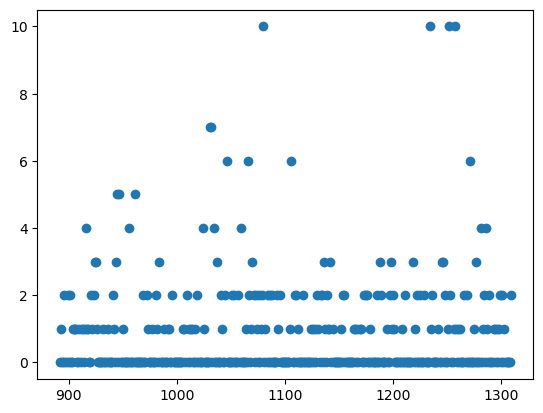

In [831]:
x = data_test_id.tolist()
y = data_test.Relatives.tolist()
plt.scatter(x, y)

In [832]:
data_test.loc[data_test.Fare > 400, 'Fare'] = data_test[(data_test.Fare < 400) & (data_test.Embarked == 'C') & 
                                                        (data_test.Pclass == 1)].Fare.mean()

In [833]:
data_test.loc[(data_test['Fare'] == 0) & (data_test['Sex'] == 'male') & (data_test['Embarked'] == 'S') & 
              (data_test['Pclass'] == 1), 'Fare'] = data_test[(data_test['Sex'] == 'male') & 
                                                              (data_test['Embarked'] == 'S') & (data_test['Pclass'] == 1)].Fare.mean()

In [834]:
data_test.loc[data_test.Relatives > 9, 'Relatives'] = data_test[data_test.Relatives < 9].Relatives.max()

In [835]:
data_test = data_test.astype({'Age': np.int64})
data_test = data_test.astype({'Fare': np.int64})

In [836]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Pclass     418 non-null    int64 
 1   Sex        418 non-null    object
 2   Age        418 non-null    int64 
 3   Fare       418 non-null    int64 
 4   Embarked   418 non-null    object
 5   Relatives  418 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 19.7+ KB


In [837]:
real_cols_test = data_test[['Age','Fare']]
cat_cols_test = data_test[['Pclass', 'Sex', 'Embarked', 'Relatives']]

In [838]:
scaler_real_cols_test = pd.DataFrame(scaler.fit_transform(real_cols_test), columns=scaler.get_feature_names_out())

In [839]:
#one_hot_cat_cols_test = pd.DataFrame(ohe.fit_transform(cat_cols_test).toarray(), columns=ohe.get_feature_names_out())
label_cat_cols_test = cat_cols_test.apply(LabelEncoder().fit_transform)

In [840]:
X_2 = pd.concat([scaler_real_cols_test, label_cat_cols_test], axis='columns', ignore_index=True)

In [841]:
X_2

,0,1,2,3,4,5
0,0.357859,-0.540212,2,1,1,0
1,1.352540,-0.540212,2,0,2,1
2,2.500250,-0.500797,1,1,1,0
3,-0.177739,-0.520505,2,1,2,0
4,-0.560309,-0.441674,2,0,2,2
...,...,...,...,...,...,...
413,-0.407281,-0.520505,2,1,2,0
414,0.740428,1.450246,0,0,0,0
415,0.663914,-0.540212,2,1,2,0
416,-0.407281,-0.520505,2,1,2,0


In [842]:
y_pred_2 = logistic.predict(X_2)

In [843]:
y_pred_2[5:11]

array([0, 1, 0, 1, 0, 0], dtype=int64)

In [844]:
gender_submission = pd.read_csv('C:/Users/markc/Downloads/gender_submission.csv')

In [845]:
gender_submission['Survived'] = y_pred_2

In [846]:
gender_submission[5:11]

,PassengerId,Survived
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
10,902,0


In [847]:
gender_submission.to_csv('logreg_titanic_3.csv', index=None)